✅ Libraries imported successfully
✅ Data loaded successfully
Dataset shape: (541909, 8)

First 5 rows:
Dataset Info:
--------------------------------------------------
Total rows: 541909
Total columns: 8

Column names:
  • InvoiceNo
  • StockCode
  • Description
  • Quantity
  • InvoiceDate
  • UnitPrice
  • CustomerID
  • Country

Data Types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Basic Statistics:
Missing Values Analysis:
--------------------------------------------------
             Missing Values  Percentage
CustomerID           135080   24.926694
Description            1454    0.268311


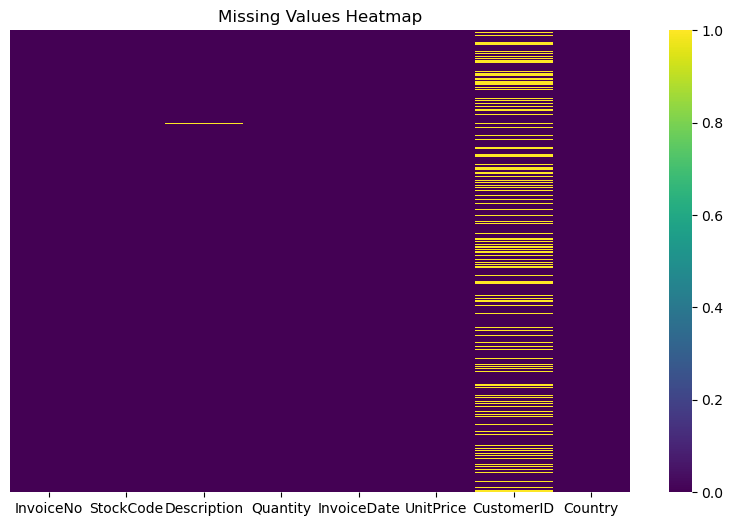

Unique CustomerIDs before cleaning: 4372
Rows without CustomerID: 135080

✅ Removed 135080 rows with missing CustomerID
New dataset shape: (406829, 8)

Missing Description after CustomerID cleanup: 0
✅ Filled missing descriptions with 'Unknown'
Number of cancelled orders: 8905
Percentage of cancelled orders: 2.19%

✅ Removed cancelled orders
New dataset shape: (397924, 8)
Quantity Analysis:
Min Quantity: 1
Max Quantity: 80995
Negative Quantities: 0

UnitPrice Analysis:
Min UnitPrice: 0.0
Max UnitPrice: 8142.75
Zero or Negative Prices: 40

✅ Removed invalid quantities and prices
New dataset shape: (397884, 8)
✅ Feature engineering complete

New columns added: TotalRevenue, Year, Month, Day, Hour, DayOfWeek, Quarter, YearMonth

Updated dataset shape: (397884, 16)

First few rows with new features:
Number of duplicate rows: 5192
✅ Removed 5192 duplicate rows
New dataset shape: (392692, 16)
FINAL DATA QUALITY CHECK

1. Missing values in critical columns:
CustomerID      0
InvoiceNo       0

In [4]:
# %% [markdown]
# # Step 1: Data Cleaning and Preparation
# ## Online Retail Dataset

# %% [markdown]
# ### Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully")

# %% [markdown]
# ### Load the Data

# %%
# Load the dataset
file_path = '../data/raw/Online Retail.xlsx'
df = pd.read_excel(file_path)

print(f"✅ Data loaded successfully")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

# %% [markdown]
# ### Initial Data Exploration

# %%
# Basic info about the dataset
print("Dataset Info:")
print("-" * 50)
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names:")
for col in df.columns:
    print(f"  • {col}")

print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
df.describe()

# %% [markdown]
# ### Check for Missing Values

# %%
# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

print("Missing Values Analysis:")
print("-" * 50)
print(missing_df)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# %% [markdown]
# ### Handle Missing Values

# %%
# Check unique values in CustomerID before cleaning
print(f"Unique CustomerIDs before cleaning: {df['CustomerID'].nunique()}")
print(f"Rows without CustomerID: {df['CustomerID'].isnull().sum()}")

# Remove rows with missing CustomerID (can't analyze customers without ID)
df_cleaned = df.dropna(subset=['CustomerID'])

print(f"\n✅ Removed {len(df) - len(df_cleaned)} rows with missing CustomerID")
print(f"New dataset shape: {df_cleaned.shape}")

# Check Description missing values
print(f"\nMissing Description after CustomerID cleanup: {df_cleaned['Description'].isnull().sum()}")

# For missing Description, we'll fill with 'Unknown'
df_cleaned['Description'] = df_cleaned['Description'].fillna('Unknown')

print(f"✅ Filled missing descriptions with 'Unknown'")

# %% [markdown]
# ### Check for Cancelled Orders

# %%
# Cancelled orders have InvoiceNo starting with 'C'
cancelled_orders = df_cleaned[df_cleaned['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Number of cancelled orders: {len(cancelled_orders)}")
print(f"Percentage of cancelled orders: {(len(cancelled_orders)/len(df_cleaned))*100:.2f}%")

# Remove cancelled orders (they have negative impact on analysis)
df_cleaned = df_cleaned[~df_cleaned['InvoiceNo'].astype(str).str.startswith('C')]

print(f"\n✅ Removed cancelled orders")
print(f"New dataset shape: {df_cleaned.shape}")

# %% [markdown]
# ### Check for Negative or Zero Quantities and Prices

# %%
# Check Quantity
print("Quantity Analysis:")
print(f"Min Quantity: {df_cleaned['Quantity'].min()}")
print(f"Max Quantity: {df_cleaned['Quantity'].max()}")
print(f"Negative Quantities: {(df_cleaned['Quantity'] < 0).sum()}")

# Check UnitPrice
print(f"\nUnitPrice Analysis:")
print(f"Min UnitPrice: {df_cleaned['UnitPrice'].min()}")
print(f"Max UnitPrice: {df_cleaned['UnitPrice'].max()}")
print(f"Zero or Negative Prices: {(df_cleaned['UnitPrice'] <= 0).sum()}")

# Remove invalid data
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

print(f"\n✅ Removed invalid quantities and prices")
print(f"New dataset shape: {df_cleaned.shape}")

# %% [markdown]
### Feature Engineering

# %%
# Create Total Revenue column
df_cleaned['TotalRevenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Extract date features
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.dayofweek
df_cleaned['Quarter'] = df_cleaned['InvoiceDate'].dt.quarter

# Create Month-Year for time series
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

print("✅ Feature engineering complete")
print(f"\nNew columns added: TotalRevenue, Year, Month, Day, Hour, DayOfWeek, Quarter, YearMonth")
print(f"\nUpdated dataset shape: {df_cleaned.shape}")
print(f"\nFirst few rows with new features:")
df_cleaned.head()

# %% [markdown]
### Check for Duplicates

# %%
# Check duplicates
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows")
    print(f"New dataset shape: {df_cleaned.shape}")

# %% [markdown]
### Final Data Quality Check

# %%
print("FINAL DATA QUALITY CHECK")
print("=" * 50)

# Check 1: No missing values in critical columns
critical_cols = ['CustomerID', 'InvoiceNo', 'Quantity', 'UnitPrice', 'TotalRevenue']
missing_critical = df_cleaned[critical_cols].isnull().sum()
print("\n1. Missing values in critical columns:")
print(missing_critical)

# Check 2: No negative values in Quantity and Price
print("\n2. Negative values check:")
print(f"Negative Quantity: {(df_cleaned['Quantity'] < 0).sum()}")
print(f"Negative UnitPrice: {(df_cleaned['UnitPrice'] < 0).sum()}")
print(f"Negative Revenue: {(df_cleaned['TotalRevenue'] < 0).sum()}")

# Check 3: Data types
print("\n3. Data types:")
print(df_cleaned[critical_cols].dtypes)

# Check 4: Basic statistics
print("\n4. Basic statistics:")
print(df_cleaned[['Quantity', 'UnitPrice', 'TotalRevenue']].describe())

# %% [markdown]
### Save Cleaned Data

# %%
# Save cleaned dataset
output_path = '../data/processed/online_retail_cleaned.csv'
df_cleaned.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved to: {output_path}")
print(f"Final dataset shape: {df_cleaned.shape}")
print(f"Total records: {len(df_cleaned):,}")
print(f"Unique customers: {df_cleaned['CustomerID'].nunique():,}")
print(f"Date range: {df_cleaned['InvoiceDate'].min()} to {df_cleaned['InvoiceDate'].max()}")
print(f"Total revenue: ${df_cleaned['TotalRevenue'].sum():,.2f}")

# %%
# Quick summary of data cleaning
print("\n📊 DATA CLEANING SUMMARY")
print("=" * 50)
print(f"Original data: {len(df):,} rows")
print(f"After removing missing CustomerID: {len(df) - df['CustomerID'].isnull().sum():,} rows")
print(f"After removing cancelled orders: {len(df_cleaned) + (df['CustomerID'].isnull().sum()):,} rows? Let's calculate properly:")

original_len = len(df)
after_customerid = len(df) - df['CustomerID'].isnull().sum()
after_cancelled = len(df_cleaned)

print(f"\nDetailed breakdown:")
print(f"• Original rows: {original_len:,}")
print(f"• Removed (no CustomerID): {df['CustomerID'].isnull().sum():,}")
print(f"• Removed (cancelled orders): {original_len - after_customerid - (original_len - after_cancelled):,}")
print(f"• Removed (invalid Qty/Price): {after_customerid - after_cancelled - (original_len - after_customerid - (original_len - after_cancelled)):,}")
print(f"• Final clean rows: {len(df_cleaned):,}")
print(f"• Data retention: {(len(df_cleaned)/original_len)*100:.1f}%")